# Download Dataset e librerie

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import itertools #fancy iteration library
import bisect #insert tool for lists

#sklearn metrics
from sklearn import metrics

#sklearn models to be compared

#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

file_path = 'ObesityDataSet.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# About The Dataset


The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [7]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9

dataset = dataset.sample(frac=1).reset_index(drop=True) #fa lo shuffle pazzo sgravato

dataset_encoded = pd.get_dummies(dataset, dtype=int) #facciamo one_hot encoding
dataset_encoded = dataset_encoded.sample(frac=1).reset_index(drop=True)

dataset_training_encoded = dataset_encoded[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test_encoded = dataset_encoded[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

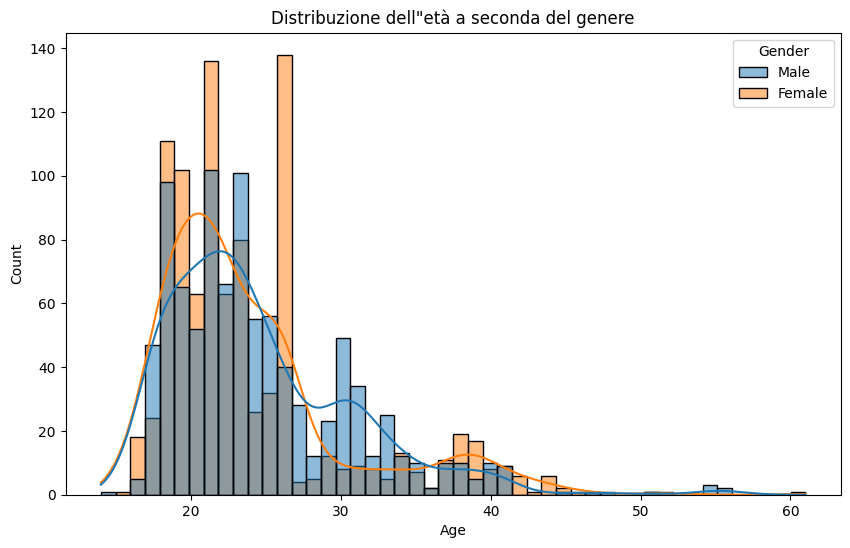

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

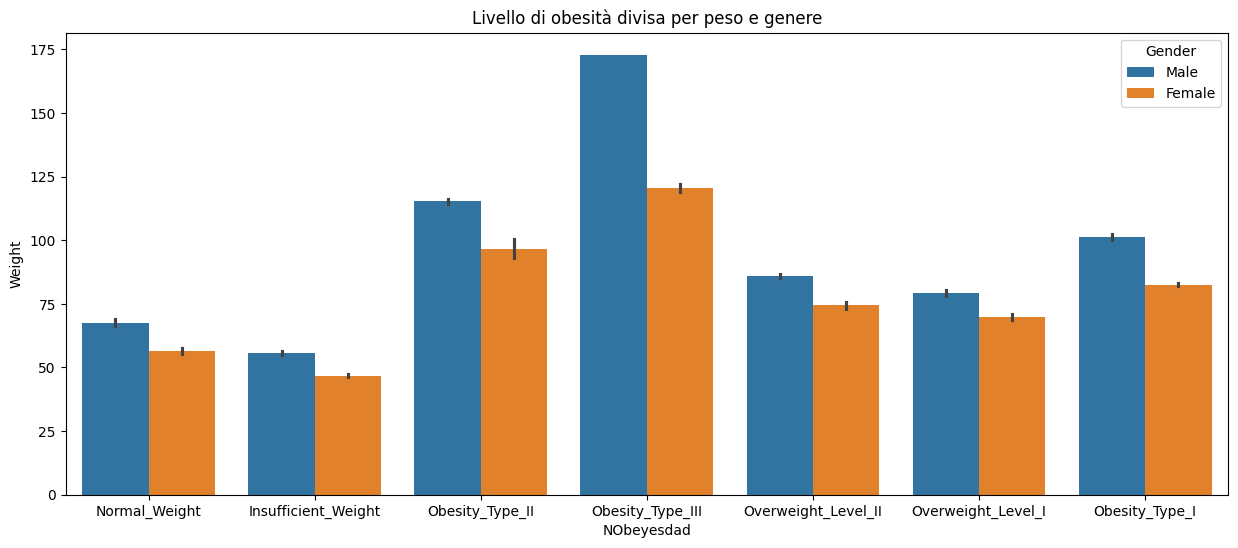

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

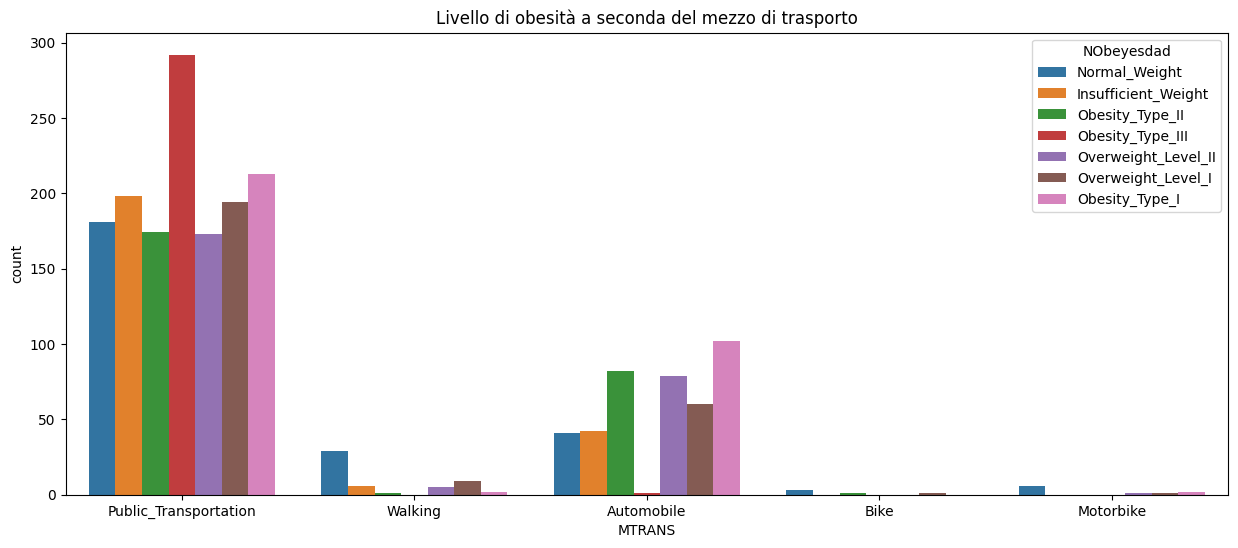

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

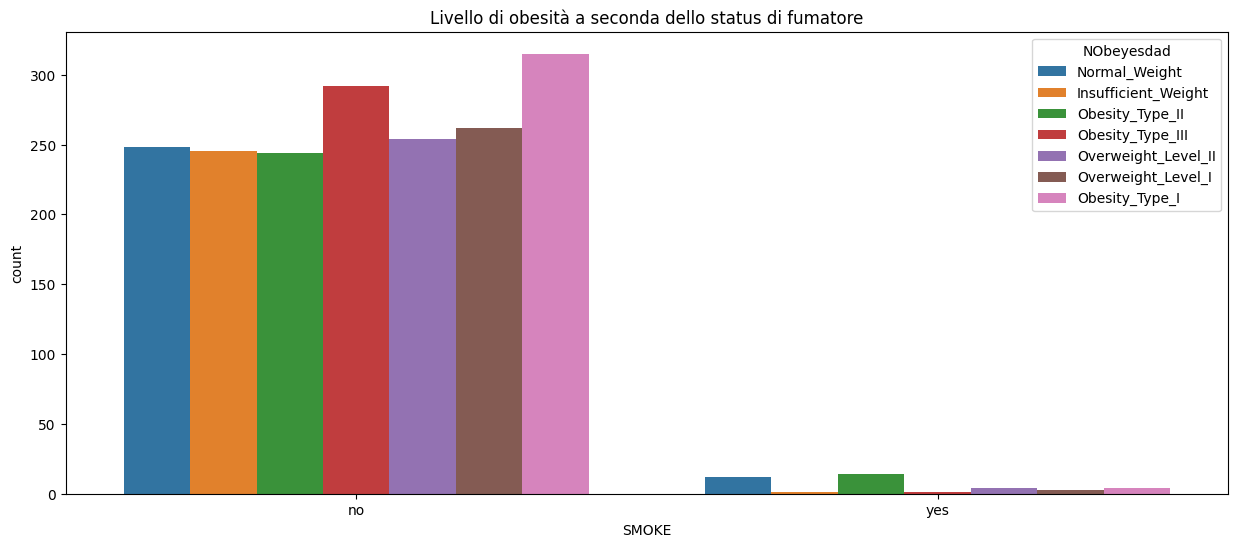

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

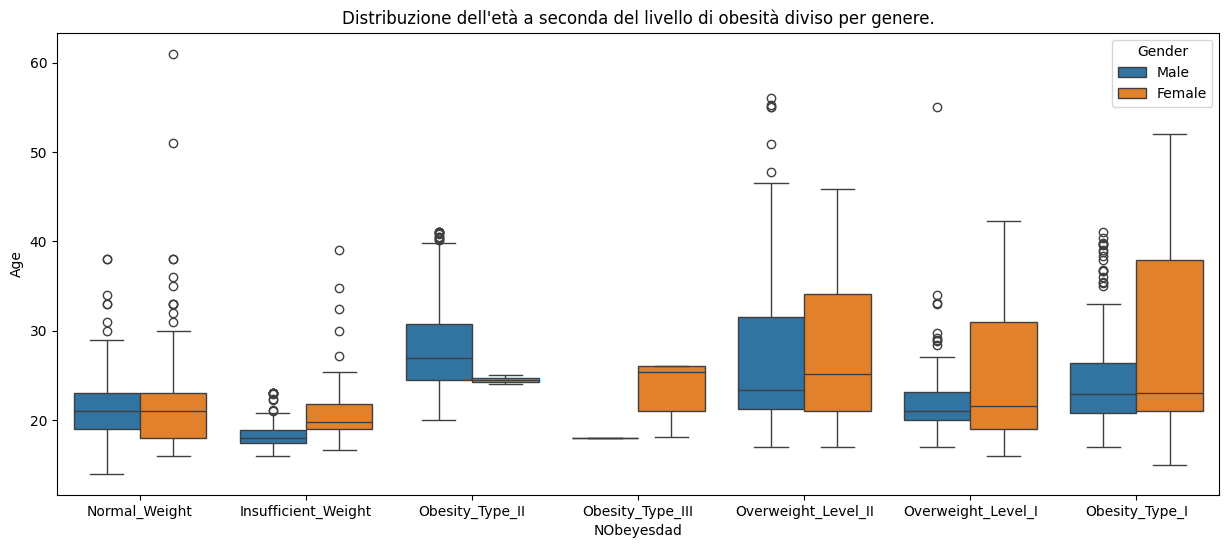

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# Funzioni di Utilità e Plot

Funzione che fa istogramma comparativo delle metriche

In [15]:

def comparative_plot(our_metrics, sklearn_metrics, labels, verbose=False, width=0.35):
  #stampiamo con Seaborn un bellissimo istogramma comparativo

  #labels e posizione
  #labels = ['MSE', 'RMSE', 'MAE']
  label_locations = np.arange(len(labels))

  if verbose:
    for i in range(len(labels)):
      print(labels[i] + ": ")
      print("\tSklearn: " + str(sklearn_metrics[i]))
      print("\tOur: " + str(our_metrics[i]))



  #spessore del rettangolo, e li creo con varie cose strane.
  #width = 0.35
  fig, ax = plt.subplots()
  our_rects = ax.bar(label_locations - width/2, our_metrics, width, label='Implementazione')
  sklearn_rects = ax.bar(label_locations + width/2, sklearn_metrics, width, label='Scikit_Learn')

  ax.set_ylabel('Valore')
  ax.set_title('Metriche')
  ax.set_xticks(label_locations)
  ax.set_xticklabels(labels)
  ax.legend()

  plt.show()


Funzione che fa grafico interpolato dell'array in ingresso

In [16]:
#fa il grafico della funzione sulle varie iterazioni
def interpolate_plot(plot_list, xlabel, ylabel):

  if not isinstance(plot_list, np.ndarray):
    plot_list = np.array(plot_list)

  x=np.arange(len(plot_list))

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.plot(x,plot_list)
  plt.show()

Funzione che calcola la Precision e Recall nel caso multiclass classification

In [17]:
def calculate_precision_recall(Y_true, Y_pred):
  # Create a dictionary to store precision and recall for each class
  precision = dict()
  recall = dict()

  # Calculate precision and recall for each class
  for cls in set(Y_true):
    true_cls_indices = [i for i, val in enumerate(Y_true) if val == cls]
    predicted_cls_indices = [i for i, val in enumerate(Y_pred) if val == cls]

    true_positive = len(set(true_cls_indices) & set(predicted_cls_indices))
    false_positive = len(predicted_cls_indices) - true_positive
    false_negative = len(true_cls_indices) - true_positive

    precision[cls] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall[cls] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

  return precision, recall


# Elaborazione del Dataset




Definiamo la conversione stringhe-numeri usando dei dizionari:


In [18]:
gender = {"Female": 0, "Male": 1}
rev_gender = {0: "Female", 1: "Male"}

FHWO = {"no": 0, "yes": 1}
rev_FHWO = {0: "no", 1: "yes"}

FAVC = {"no": 0, "yes": 1}
rev_FAVC = {0: "no", 1: "yes"}

CAEC = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
rev_CAEC = {0: "no", 1: "Sometimes", 2: "Frequently", 3: "Always"}

SMOKE = {"no": 0, "yes": 1}
rev_SMOKE = {0: "no", 1: "yes"}

SCC = {"no": 0, "yes": 1}
rev_SCC = {0: "no", 1: "yes"}

CALC = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
rev_CALC = {0: "no", 1: "Sometimes", 2: "Frequently", 3: "Always"}

MTRANS = {"Bike": 0, "Automobile": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4}


NObeyesdad = {"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}





Definiamo una funzione che dato un dataset in ingresso, converte le stringhe,
e rimuove la colonna "column" che ritorna come Y, il restante come X

In [19]:
def process_dataset(dataset, str):


  #TODO: codice vecchio, da rimuovere
  #rows = ("Female", "Male", "no", "yes", "Sometimes", "Frequently", "Always", "Bike", "Automobile", "Motorbike", "Public_Transportation", "Walking")
  #values = [0, 1, 0, 1, 1, 2, 3, 0 , 1, 2, 3, 4]
  #prova = dataset_training.replace(to_replace=rows, value=values)

  #dataset_test.loc[dataset_test['Gender'] == 'Male', 'Gender'] = 1

  #salviamo copia profonda perché sennò facciamo side-effect
  ds = dataset.copy()

  #cambiamo le etichette in numeri

  ds.Gender.replace(to_replace=gender, inplace=True)
  ds.family_history_with_overweight.replace(to_replace=FHWO, inplace=True)
  ds.FAVC.replace(to_replace=FAVC, inplace=True)
  ds.CAEC.replace(to_replace=CAEC, inplace=True)
  ds.SMOKE.replace(to_replace=SMOKE, inplace=True)
  ds.SCC.replace(to_replace=SCC, inplace=True)
  ds.CALC.replace(to_replace=CALC, inplace=True)
  ds.MTRANS.replace(to_replace=MTRANS, inplace=True)
  ds.NObeyesdad.replace(to_replace=NObeyesdad, inplace=True)



  Y = ds[str]
  del ds[str]

  return (ds, Y)

def process_encoded_dataset(dataset, str): #in caso ha già subito codifica one hot faccio solo separazione X, Y
  ds = dataset.copy()
  Y = ds[str]
  del ds[str]

  return (ds, Y)


#Regressione Lineare con Equazione Normale

Stimiamo il peso a partire dagli altri dati

Funzione di regressione lineare che usa l'equazione normale e funzione che data C e X stima il valore di Y

In [20]:
def linear_regression_normaleq(X, Y):
  if not isinstance(X, np.ndarray):
    X = X.to_numpy()
  if not isinstance(Y, np.ndarray):
    Y = Y.to_numpy()

  #faccio regressione lineare usando l'equazione normale
  bias = np.ones(shape=(len(X), 1))
  X = np.concatenate((bias, X), axis=1)

  #calcolo pseudoinversa di Moore Penrose
  p_X = np.linalg.pinv(X)

  C = p_X @ Y
  return C

def lr_predict(X, C):
  if not isinstance(X, np.ndarray):
    X = X.to_numpy()

  #aggiunta del bias
  bias = np.ones(shape=(len(X), 1))
  X = np.concatenate((bias, X), axis=1)

  #C_t = np.transpose(C)
  Y_predict = X @ C
  return Y_predict


Splittiamo il dataset

In [21]:
#prendiamo il dataset training, e lo splittiamo come richiesto
#vedere funzioni sopra, ci separa il valore weight che è l'obiettivo dai dati
X_train, Y_train = process_dataset(dataset_training, "Weight")
X_test, Y_test = process_dataset(dataset_test, "Weight")


/tmp/ipykernel_81480/3314704038.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender, inplace=True)
/tmp/ipykernel_81480/3314704038.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to_replace=gender, inplace=True)
/tmp/ipykernel_81480/3314704

Calcoliamo il vettore C dei pesi con le funzioni qui sopra

In [22]:
C = linear_regression_normaleq(X_train, Y_train)

Y_predict = lr_predict(X_test, C)
MSE = metrics.mean_squared_error(Y_predict, Y_test)
MAE = metrics.mean_absolute_error(Y_predict, Y_test)

#stampiamo MSE e MAE
print("our Root Mean Squared Error: " + str(np.sqrt(MSE)))
print("our Mean Squared Error: " + str(MSE))
print("our Mean Absolute Error: " + str(MAE))


our_metrics = [MSE, np.sqrt(MSE), MAE]


our Root Mean Squared Error: 5.3588782047426315
our Mean Squared Error: 28.717575613265605
our Mean Absolute Error: 3.7627825346996397


Validiamo il nostro codice comparandolo con Scikit Learn

In [23]:
#usiamo ora scikit_learn come comparativa
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_predict = lr_model.predict(X_test)

MSE = metrics.mean_squared_error(Y_predict, Y_test)
MAE = metrics.mean_absolute_error(Y_predict, Y_test)

#stampiamo MSE e MAE
print("Scikit_learn Root Mean Squared Error: " + str(np.sqrt(MSE)))
print("Scikit_learn Mean Squared Error: " + str(MSE))
print("Scikit_learn Mean Absolute Error: " + str(MAE))

sklearn_metrics = [MSE, np.sqrt(MSE), MAE]

Scikit_learn Root Mean Squared Error: 5.358878204742587
Scikit_learn Mean Squared Error: 28.717575613265133
Scikit_learn Mean Absolute Error: 3.7627825346996118


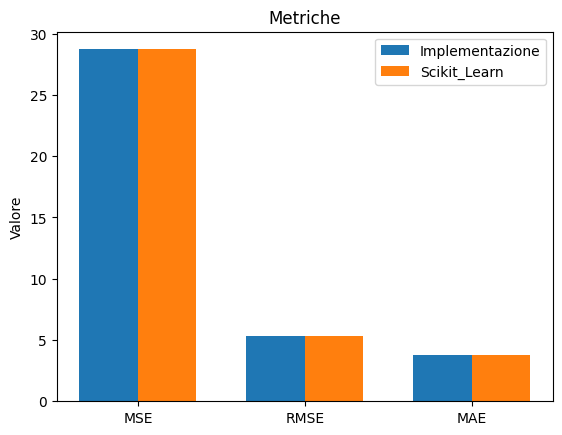

In [24]:
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'])

# Regressione Lineare con Equazione Normale e con One Hot

Facciamo ora brevemente le stesse cose con la codifica One Hot

In [25]:
#qui con codifica one_hot
X_train, Y_train = process_encoded_dataset(dataset_training_encoded, "Weight")
X_test, Y_test = process_encoded_dataset(dataset_test_encoded, "Weight")
C = linear_regression_normaleq(X_train, Y_train)

Y_predict = lr_predict(X_test, C)
MSE = metrics.mean_squared_error(Y_predict, Y_test)
MAE = metrics.mean_absolute_error(Y_predict, Y_test)

our_metrics = [MSE, np.sqrt(MSE), MAE]

#usiamo ora scikit_learn come comparativa
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_predict = lr_model.predict(X_test)

MSE = metrics.mean_squared_error(Y_predict, Y_test)
MAE = metrics.mean_absolute_error(Y_predict, Y_test)

sklearn_metrics = [MSE, np.sqrt(MSE), MAE]


MSE: 
	Sklearn: 27.92489389942025
	Our: 27.924893899420233
RMSE: 
	Sklearn: 5.284400997220049
	Our: 5.284400997220048
MAE: 
	Sklearn: 3.794663565347416
	Our: 3.7946635653474274


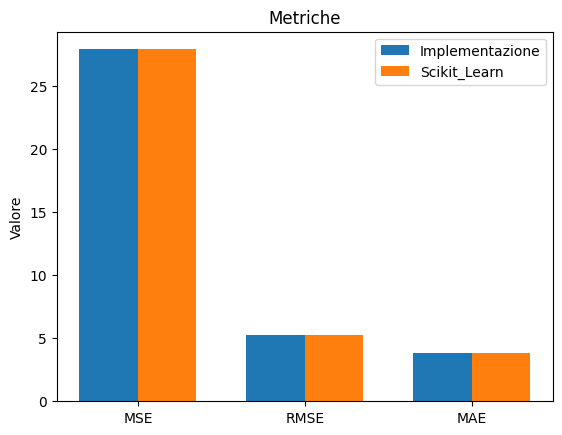

In [26]:
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

# Regressione Lineare con SGD e Regolarizzazione

Qui creiamo funzione che calcola C usando lo Stochastic Gradient Descent, la funzione di loss usata è lo squared mean error, di cui calcoliamo il gradiente manualmente



N: è il numero di campioni (cioè la lunghezza di Y) \\
Y: valori che assume la funzione (nel nostro caso il Weight) \\
X: valori da cui dobbiamo predirre \\
c: i pesi della regressione lineare \\

$L(c) = \frac{1}{N}||Xc - Y||^2 = \frac{1}{N}(Xc - Y)^T(Xc-Y) = \frac{1}{N}(c^TX^TXc -2Y^TXc + ||Y||^2)$

Si nota che $c^TX^TXc$ è una funzione quadratica con $Q=2X^TX$ il cui gradiente noto è $Qc = 2X^TXc$

Calcoliamo il gradiente di $-2Y^TXc$ che risulta essere $-2Y^TX$ che può essere trasposto in $-2X^TY$, il gradiente di $||Y||^2$ è nullo.

$\nabla_{c}L(c) = \frac{1}{N}(2X^TXc -2X^TY) = \frac{2}{N}X^T(Xc - Y)$

Scriviamo funzione che calcola la regolarizzazione

Per L2
$R(c) = ||c||^2,  \nabla R(c) = 2c$

Per L1, $\nabla R(c)$ è il segno di $R(c)$

In [27]:


#alpha: parametro di regolarizzazione | regularization: tipo di regolarizzazione | reg_ratio: rapporto in elastic net
#verbose: se fare grafico RMSE e stampare | epoch: separazione dataset in pezzi | lr: learning_rate dello SGD | iterations: iterazioni da fare
def linear_regression_SGD(X, Y, regularization=None, reg_param=10e-4, reg_ratio = 0.15, verbose=False, epoch=10, lr=10e-5, decay_rate=1000000, iterations=1000000):
  if not isinstance(X, np.ndarray):
    X = X.to_numpy()
  if not isinstance(Y, np.ndarray):
    Y = Y.to_numpy()

  MSE_list = list() #lista degli errori sul training set, li salviamo per fare il grafico

  bias = np.ones(shape=(len(X), 1)) #colonna di bias
  X = np.concatenate((bias, X), axis=1)

  X_split = np.array_split(X, epoch)
  Y_split = np.array_split(Y, epoch)

  _, N = np.shape(X) #prendiamo numero parametri per generare C

  C = np.random.rand(N,)  #generiamo C in maniera casuale, qua se metti (N,1) fa saltare in aria tutto

  epoches =  iterations * epoch # un milione di epoche

  for i in range(epoches):

    X_batch = X_split[i % epoch]
    Y_batch = Y_split[i % epoch]

    G_complexity = 0

    if regularization == 'l2': #Ridge
      G_complexity = reg_param*2*C
    elif regularization == 'l1': #Lasso
      G_complexity = reg_param*np.sign(C)
    elif regularization == 'elasticnet':
      G_complexity = reg_param * (reg_ratio* np.sign(C) + (1-reg_ratio) * 2 * C ) #reg_ratio gestisce quanto applicare le due regolarizzazioni

    a = lr

    if decay_rate != None:
      a *= decay_rate/(decay_rate+i)  #decading learning rate come dalle slide

    G = 2 * (X_batch.T @ ((X_batch @ C) - Y_batch)) / len(X_batch) # / N
    C_i = C - a * (G + G_complexity) #qui costruiamo il gradiente come la somma del gradiente dell'MSE e della regolarizzazione


    if i % (10 * epoch) == 0: #ogni 10 epoche salviamo dati sull'MSE
      Y_batch_predict =  X_batch @ C_i
      MSE_list.append(metrics.mean_squared_error(Y_batch_predict, Y_batch))

    if (i % (10000 * epoch) == 0) and verbose: #stampiamo ogni 10mila epoch
      print("siamo all'iterazione: " + str(i) + "  (" + str(i*100 / epoches) + "%)")

    if np.linalg.norm(G) <= 10e-5: #ci fermiamo se il gradiente è quasi nullo
      print("Early stopping G iterazione: " + str(i) + "  (" + str(i*100 / epoches) + "%)")
      break

    if np.linalg.norm(C - C_i) <= 10e-6 : # ci fermiamo se ci stiamo spostati di poco
      print("Early stopping C_diff iterazione: " + str(i) + "  (" + str(i*100 / epoches) + "%)")
      break

    C = C_i ##aggiorniamo C

  if verbose:
    print("Grafico dell'MSE sul Train set durante le iterazioni dello SGD")
    MSE_list = np.sqrt(np.array(MSE_list))
    interpolate_plot(MSE_list, xlabel="Iterazioni", ylabel="Root MSE")

  return C


Come funziona il Mini-Batch SGD?

batch più piccoli necessitano di più iterazioni, ma ognuna
è meno costosa temporalmente
batch--, epoches++, time--

batch più grandi, necessiti di meno iterazioni, ma ognuna è più costosa
batch++, epoches--, time++


N_camp / batch_size = riduzione di computazione
error_gradiente è proporzionale a sqrt(riduzione di comp)

Esempio:
1000 campioni | batch_size = 10 -> riduzione di computazione = 100
Errore = sqrt(100) = 10, quindi necessarie 10 volte le iterazioni in più



Qui svolgiamo l'esecuzione della funzione che calcola i pesi con lo SGD

In [28]:
X_train, Y_train = process_dataset(dataset_training, "Weight")
X_test, Y_test = process_dataset(dataset_test, "Weight")

/tmp/ipykernel_81480/3314704038.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds.Gender.replace(to_replace=gender, inplace=True)
/tmp/ipykernel_81480/3314704038.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.Gender.replace(to_replace=gender, inplace=True)
/tmp/ipykernel_81480/3314704

In [29]:
def lr_SGD_parameters(reg_penalty, reg_param, lr, iter, reg_ratio, epoch, decay_rate, verbose=False):
  C = linear_regression_SGD(X_train, Y_train, verbose=verbose, regularization=reg_penalty, reg_param=reg_param, lr=lr, iterations=iter, reg_ratio=reg_ratio, epoch=epoch, decay_rate=decay_rate)

  Y_predict = lr_predict(X_test, C)

  MSE = metrics.mean_squared_error(Y_predict, Y_test)
  MAE = metrics.mean_absolute_error(Y_predict, Y_test)

  our_metrics = [MSE, np.sqrt(MSE), MAE]

  if verbose:
    #stampiamo MSE e MAE
    print("our Root Mean Squared Error: " + str(np.sqrt(MSE)))
    print("our Mean Squared Error: " + str(MSE))
    print("our Mean Absolute Error: " + str(MAE))
    print()

  #usiamo ora scikit_learn come comparativa
  lr_model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=iter, learning_rate='constant', eta0=lr, alpha=reg_param, loss="squared_error", penalty=reg_penalty, l1_ratio = reg_ratio))
  lr_model.fit(X_train, Y_train)
  Y_predict = lr_model.predict(X_test)

  MSE = metrics.mean_squared_error(Y_predict, Y_test)
  MAE = metrics.mean_absolute_error(Y_predict, Y_test)

  sklearn_metrics = [MSE, np.sqrt(MSE), MAE]

  if verbose:
    #stampiamo MSE e MAE
    print("Scikit_learn Root Mean Squared Error: " + str(np.sqrt(MSE)))
    print("Scikit_learn Mean Squared Error: " + str(MSE))
    print("Scikit_learn Mean Absolute Error: " + str(MAE))

  return our_metrics, sklearn_metrics

# Prova Iperparametri Regressione Lineare (con SGD e Regolarizzazione)

Le iterazioni sono ridotte altrimenti l'esecuzione del colab è troppo lunga

Varie metriche e fitting, proviamo diversi iperparametri


*   Regolarizzazione | Elasticnet
*   Moltiplicatore λ di Regolarizzazione | $10^{-4}$
*   Learning Rate | $10^{-5}$
*   Iterazioni | 500.000
*   Rapporto di L1 | $R_{L1}=0.15$
*   Rapporto di L2 | $R_{L2} = 1 - R_{L1} = 0.85$
*   Decay Rate of LR | 1.000.000
*   Batch Size | 10



In [ ]:
our_metrics, sk_learn_metrics = lr_SGD_parameters(reg_penalty='elasticnet', reg_param=10e-4, lr=10e-5, iter=500000, reg_ratio=0.15, decay_rate=1000000, epoch=10, verbose=True)
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

siamo all'iterazione: 0  (0.0%)
siamo all'iterazione: 100000  (2.0%)
siamo all'iterazione: 200000  (4.0%)
siamo all'iterazione: 300000  (6.0%)
siamo all'iterazione: 400000  (8.0%)
siamo all'iterazione: 500000  (10.0%)
siamo all'iterazione: 600000  (12.0%)
siamo all'iterazione: 700000  (14.0%)
siamo all'iterazione: 800000  (16.0%)
siamo all'iterazione: 900000  (18.0%)
siamo all'iterazione: 1000000  (20.0%)
siamo all'iterazione: 1100000  (22.0%)
siamo all'iterazione: 1200000  (24.0%)
siamo all'iterazione: 1300000  (26.0%)
siamo all'iterazione: 1400000  (28.0%)
siamo all'iterazione: 1500000  (30.0%)
siamo all'iterazione: 1600000  (32.0%)
siamo all'iterazione: 1700000  (34.0%)
siamo all'iterazione: 1800000  (36.0%)
siamo all'iterazione: 1900000  (38.0%)
siamo all'iterazione: 2000000  (40.0%)



*   Regolarizzazione | L2
*   Moltiplicatore λ di Regolarizzazione | $10^{-4}$
*   Learning Rate | $10^{-4}$
*   Iterazioni per Batch | 700.000
*   Decay Rate of LR | 1.000.000
*   Batch Size | 20

In [ ]:
our_metrics, sk_learn_metrics = lr_SGD_parameters(reg_penalty='l2', reg_param=10e-4, lr=10e-4, iter=700000, reg_ratio=0.15, epoch=20, decay_rate=1000000)
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)



*   Regolarizzazione | Nessuna
*   Learning Rate | $2*10^{-5}$
*   Iterazioni per Batch | 500.000
*   Decay Rate of LR | 1.000.000
*   Batch Size | 15

In [ ]:
our_metrics, sk_learn_metrics = lr_SGD_parameters(reg_penalty=None, reg_param=10e-4, lr=2*10e-5, iter=500000, reg_ratio=0.15, epoch=15, decay_rate=1000000)
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)



*   Regolarizzazione | L1
*   Moltiplicatore λ di Regolarizzazione | $10^{-4}$
*   Learning Rate | $10^{-5}$
*   Iterazioni per Batch | 150.000
*   Decay Rate of LR | Nessuno
*   Batch Size | 15

In [ ]:
our_metrics, sk_learn_metrics = lr_SGD_parameters(reg_penalty='l1', reg_param=10e-4, lr=10e-5, iter=150000, reg_ratio=0.15, epoch=15, decay_rate=None)
comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

<h3>Facciamo ora le seguenti osservazioni finali unendo conoscenze teoriche con fatti sperimentali</h3>

Il dataset subisce uno shuffle a ogni chiamta di questo Colab, quindi i risultati possono cambiare

In generale con un aumento di iterazioni abbiamo una maggiore convergenza ai risultati di Sklearn, a volte anche superandoli, è possibile fare un grafico dell'MSE sul train set per verificarla

Alla fine della valutazione l'MSE sui test set mostra risultati molto simili con Sklearn

In generale aumentare le iterazioni assicura la convergenza all'ottimo, un ottimo batch-size di circa 10-20 aiuta.

La regolarizzazione L1 è risultata nella media la migliore nelle simulazioni

Un Learning Rate superiore a $2 * 10^{-5}$ porta a divergenza, prevedibile considerando che il passo deve essere piccolo, tanto la funzione è convessa e converge a un minimo globale

Il decay rate è effettivamente inutile in questi casi, è più utile per la classificazione

Il fattore di regolarizzazione è preso il più alto possibile che non causi divergenza secondo fatti sperimentali, visto che ridurlo ancora renderebbe la regolarizzazione inutile da attivare

-----------------------------

In generale usare il gradiente è più rapido in caso siano presenti molte features, negli altri casi è preferibile usare l'equazione normale, che ha forme chiuse anche per le regolarizzazioni L1 e L2, non qui implementate

Comunque va ricordato che la Regressione Lineare è tra i più elementari metodi di Machine Learning, e in caso di una relazione non co-lineare tra i dati non è in grado di produrre risultati accettabili

Tuttavia è molto performante fare predizioni ed è facilmente utilizzabile anche su una miriade di sistemi, tra cui gli embedded, essendo previsto solo un prodotto matriciale come calcolo.



# Classificazione con Regressione Logistica (con Regolarizzazione)



Lo scopo ora è quello di classificare la classe di peso avendo tutti gli altri dati, cioè classificare in 0 le persone nell'intervallo [Sottopeso, Sovrappeso]
e in 1 tutte le altre

Come prima cosa costruiamo il dataset, e convertiamo in binario le classificazioni dell'obesità


In [ ]:
#copiamo i dataset già splittati
ds_training = dataset_training.copy()
ds_test = dataset_test.copy()

#definiamo dizionario di conversione binaria
binary_conversion_obesity = {"Insufficient_Weight": 0, "Normal_Weight": 0, "Overweight_Level_I": 0, "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1, "Obesity_Type_III": 1}

#convertiamo con la funzione replace
ds_training.replace(to_replace=binary_conversion_obesity, inplace=True)
ds_test.replace(to_replace=binary_conversion_obesity, inplace=True)

#splittiamo e trasformiamo i restanti dati in numeri
X_train, Y_train = process_dataset(ds_training, "NObeyesdad")
X_test, Y_test = process_dataset(ds_test, "NObeyesdad")



Grafico di come funziona la matrice di confusione, contenente visivamente già i dati di True/False Negative e True/False Positive, presa da Internet

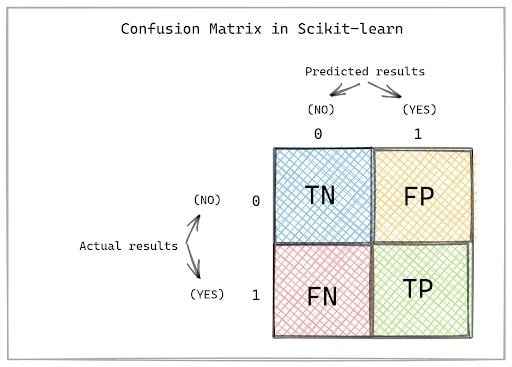

Definiamo ora la funzione Sigmoide, che viene clippata per evitare NaN, tanto già a 50 vale 0,9999999

Implementiamo poi la funzione di threshold vista a lezione

In [ ]:
def sigmoid(w,X):
  if not isinstance(X, np.ndarray):
    X = X.to_numpy()

  z = X @ w

  z=np.clip(z,-50,50)
  Y = 1/(1+np.exp(-z))
  return Y

def threshold(z, value):
  ris = np.copy(z)

  ris[ris >= value] = 1
  ris[ris < value] = 0
  return ris

def cross_entropy(p):
    eps = 10e-6
    return -p*np.log2(p+eps)-(1-p)*np.log2(1-p+eps)


Regressione logistica allenata con SGD e funzione di loss Cross Entropy come visto a lezione

In [ ]:
def logistic_regression(X, Y, regularization=None, reg_param=10e-4, reg_ratio=0.15, verbose=False, epoch=10, lr=10e-4, decay_rate=10000, iterations=10000):
  if not isinstance(X, np.ndarray):
    X = X.to_numpy()
  if not isinstance(Y, np.ndarray):
    Y = Y.to_numpy()

  ACC_list = list()
  tres=0.5

  X_split = np.array_split(X, epoch)
  Y_split = np.array_split(Y, epoch)

  _, N = np.shape(X) #prendiamo numero parametri per generare C

  w = np.random.rand(N,)  #generiamo w in maniera casuale, qua se metti (N,1) fa saltare in aria tutto
  #w=w.reshape(-1,1)

  epoches =  iterations * epoch # un milione di epoche

  for i in range(epoches):

    X_batch = X_split[i % epoch]
    Y_batch = Y_split[i % epoch]

    a = lr * decay_rate/(decay_rate+i)  #decading learning rate come dalle slide

    Y_eval = sigmoid(w, X_batch)

    Y_pred = threshold(Y_eval, tres)

    G_complexity = 0

    if regularization == 'l2': #Ridge
      G_complexity = reg_param*2*w
    elif regularization == 'l1': #Lasso
      G_complexity = reg_param*np.sign(w)
    elif regularization == 'elasticnet':
      G_complexity = reg_param * (reg_ratio* np.sign(w) + (1-reg_ratio) * 2 * w ) #reg_ratio gestisce quanto applicare le due regolarizzazioni




    G = (Y_eval - Y_batch) @ X_batch  #Binary Cross-Entropy Loss function
    G = G / len(X_batch)
    w_i = w - a * (G + G_complexity)

    if verbose and (i % (100 * epoch) == 0): #stampiamo ogni 10mila epoch
      print("siamo all'iterazione: %d (%.2f%%)" % (i, i*100 / epoches))
      print("costo Cross Entropy Loss: %f" % (np.sum(cross_entropy(Y_eval)) / len(Y_batch)))
      #calcolo dell'accuracy (da scikit-learn) per aggiungerla alla lista
      ACC=metrics.accuracy_score(Y_batch,Y_pred)
      ACC_list.append(ACC)


    if np.linalg.norm(G) <= 10e-5: #ci fermiamo se il gradiente è quasi nullo
      print("Early stopping G_norm iterazione: " + str(i) + "  (" + str(i*100 / epoches) + "%)")
      break

    if np.linalg.norm(w - w_i) <= 10e-6: # ci fermiamo se ci stiamo spostati di poco
      print("Early stopping w_diff iterazione: " + str(i) + "  (" + str(i*100 / epoches) + "%)")
      break

    w = w_i #aggiorniamo w


  if verbose:
      print("Grafico dell'Accuracy sul Train set durante le iterazioni dello SGD")
      ACC_list = np.array(ACC_list) * 100
      interpolate_plot(ACC_list, xlabel='Iterazioni', ylabel='Accuracy (%)')

  return w

def logistic_predict(w, X, tres=0.5):
  Y_score = sigmoid(w, X)
  Y_pred = threshold(Y_score, tres)
  return Y_pred

def logistic_predict_proba(w, X):
  Y_score = sigmoid(w, X)
  return Y_score

Calcolo della regressione logistica con la funzione qui sopra, comparazione con sklearn, stampa delle metriche, e grafici


In [ ]:
def logistic_parameters(verbose=False, epoch=10, lr=10e-4, iterations=10000, decay_rate=10000, regularization=None, reg_param=10e-4, reg_ratio = 0.15):
  w = logistic_regression(X_train, Y_train, verbose=verbose, epoch=epoch, iterations=iterations, decay_rate=decay_rate, regularization=regularization, reg_param=reg_param, reg_ratio=reg_ratio)
  Y_pred = logistic_predict(w, X_test)
  Y_score = logistic_predict_proba(w, X_test)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  print('Our Accuracy: %.2f%%' % (accuracy*100))

  F1_score = metrics.f1_score(Y_test, Y_pred)
  print('Our F1 Score: %.2f%%' % (F1_score*100))


  #curva ROC e AUC
  fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
  AUC = metrics.auc(fpr, tpr)
  print('Our AUC: %.2f%%' % (AUC*100))

  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC, estimator_name='Our estimator')
  display.plot()
  plt.show()

  #matrice di confusione
  metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
  plt.show()

  #Precision e Recall curve
  metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_score)
  plt.show()

  our_metrics = [accuracy, F1_score, AUC]

  #saga è lo stochastic average gradient adapative, il più vicino metodo che supporta tutte le regolarizzazioni.
  logreg_model = LogisticRegression(penalty=regularization, C=1, solver='saga', max_iter=iterations, l1_ratio=reg_ratio)
  logreg_model.fit(X_train, Y_train.values.ravel())
  Y_pred = logreg_model.predict(X_test)
  Y_score = logreg_model.predict_proba(X_test)[:, 1] #pigliamo il [:, 1]

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  print('Scikit_Learn Accuracy: %.2f%%' % (accuracy*100))
  F1_score = metrics.f1_score(Y_test, Y_pred)
  print('Scikit_Learn F1 Score: %.2f%%' % (F1_score*100))

  fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
  AUC = metrics.auc(fpr, tpr)
  print('Scikit_Learn AUC: %.2f%%' % (AUC*100))
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC, estimator_name='Scikit_learn estimator')
  display.plot()
  plt.show()

  #matrice di confusione
  metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
  plt.show()

  #Precision e Recall curve
  metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_score)
  plt.show()

  sklearn_metrics = [accuracy, F1_score, AUC]

  return our_metrics, sklearn_metrics

# Prova Iperparametri Regressione Logistica (con Regolarizzazione)


*   Regolarizzazione | L2
*   Moltiplicatore λ di Regolarizzazione | $10^{-4}$
*   Learning Rate | $10^{-4}$
*   Iterazioni per Batch | 20.000
*   Decay Rate of LR | 10.000
*   Batch Size | 10

In [ ]:
our_metrics, sklearn_metrics = logistic_parameters(verbose=True, epoch=10, lr=10e-4, iterations=20000, decay_rate=10000, regularization='l2', reg_param=10e-4, reg_ratio = 0.15)

comparative_plot(our_metrics, sklearn_metrics, labels=['Accuracy', 'F1 Score', 'AUC'], verbose=False)


*   Regolarizzazione | Elasticnet
*   Moltiplicatore λ di Regolarizzazione | $10^{-4}$
*   Learning Rate | $10^{-3}$
*   Iterazioni per Batch | 15.000
*   Rapporto di L1 | $R_{L1}=0.15$
*   Rapporto di L2 | $R_{L2} = 1 - R_{L1} = 0.85$
*   Decay Rate of LR | 10.000
*   Batch Size | 15

In [ ]:
our_metrics, sklearn_metrics = logistic_parameters( verbose=False, epoch=15, lr=10e-3, iterations=15000, decay_rate=10000, regularization='elasticnet', reg_param=10e-4, reg_ratio = 0.15)

comparative_plot(our_metrics, sklearn_metrics, labels=['Accuracy', 'F1 Score', 'AUC'], verbose=True)


*   Regolarizzazione | Nessuna
*   Learning Rate | $10^{-4}$
*   Iterazioni per Batch | 15.000
*   Decay Rate of LR | 10.000
*   Batch Size | 5

In [ ]:
our_metrics, sklearn_metrics = logistic_parameters(verbose=False, epoch=5, lr=10e-4, iterations=15000, decay_rate=10000, regularization=None, reg_param=10e-4, reg_ratio = 0.15)
comparative_plot(our_metrics, sklearn_metrics, labels=['Accuracy', 'F1 Score', 'AUC'], verbose=True)

<h3>Facciamo ora le seguenti osservazioni finali unendo conoscenze teoriche con fatti sperimentali</h3>

Il dataset subisce uno shuffle a ogni chiamta di questo Colab, quindi i risultati possono cambiare

In generale con un aumento di iterazioni abbiamo una maggiore convergenza ai risultati di Sklearn, a volte anche superandoli, è possibile fare un grafico dell'accuracy sul train set per verificarla

Alla fine della valutazione la nostra implementazione supera anche Sklearn in termini di Accuracy, F1 e AUC

In generale aumentare le iterazioni assicura la convergenza all'ottimo, un ottimo batch-size di circa 10-20 aiuta.

La regolarizzazione L2 è risultata nella media la migliore nelle simulazioni, in particolare migliore è il primo esperimento qui sopra.

Un Learning Rate superiore a $10^{-4}$ porta a divergenza, prevedibile considerando che il passo deve essere piccolo.

Il decay rate aiuta di molto a stabilizzare verso la fine dell'allenamento a valori alti di accuracy

Il fattore di regolarizzazione è preso il più alto possibile che non causi divergenza secondo fatti sperimentali, visto che ridurlo ancora renderebbe la regolarizzazione inutile da attivare

-----------------------------

Teoricamente la regressione logistica ci ritorna una probabilità tra 0 e 1, e poi applicando la threshold decidiamo quale dei due ritornare

Anche in questo caso l'implementazione del modello anche su sistemi embedded è facile poiché comunque sia è un applicazione log-lineare(?????) e avendo i pesi e il threshold è facile applicarla con pochi calcoli

I risultati ottenuti sono eccellenti, eguali a Sklearn e i valori di Accuracy, F1 Score, AUC e la matrice di confusione (di conseguenza) rispecchiano un ottimo classificatore

# Classificazione con Decision Tree


Lo scopo ora è quello di classificare la classe di peso avendo tutti gli altri dati, cioè classificare in 0 le persone nell'intervallo [Sottopeso, Sovrappeso]
e in 1 tutte le altre

Partiamo con il costruire il dataset necessario, cioè associando alle classifiche di obesità i valori giusti, e troncando a intero i dati eventuali (tipo height)


In [ ]:
ds = dataset.copy()

ds['Height'] = ds['Height'].apply(lambda x : x * 10) #convertiamo l'altezza in un intero, dopo averla moltiplicata per 10.
ds = ds.astype({"Age": int, "Height": int, "Weight": int, "FCVC": int, "NCP": int, "CH2O": int, "FAF": int, "TUE": int}) #amche gli altri dati vengono convertiti in intero
ds.Gender.replace(to_replace=gender, inplace=True)
ds.family_history_with_overweight.replace(to_replace=FHWO, inplace=True)
ds.FAVC.replace(to_replace=FAVC, inplace=True)
ds.CAEC.replace(to_replace=CAEC, inplace=True)
ds.SMOKE.replace(to_replace=SMOKE, inplace=True)
ds.SCC.replace(to_replace=SCC, inplace=True)
ds.CALC.replace(to_replace=CALC, inplace=True)
ds.MTRANS.replace(to_replace=MTRANS, inplace=True)

binary_conversion_obesity = {"Insufficient_Weight": 0, "Normal_Weight": 0, "Overweight_Level_I": 0, "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1, "Obesity_Type_III": 1}
ds.NObeyesdad.replace(to_replace=binary_conversion_obesity, inplace=True)

ds = ds.sample(frac=1).reset_index(drop=True) #fa lo shuffle pazzo sgravato

ds_training = ds[:int(len(ds) * TRAIN_TEST_SPLIT_PERCENTAGE)]
ds_test = ds[int(len(ds) * TRAIN_TEST_SPLIT_PERCENTAGE):]


#qui manipoliamo il dataset per renderlo digeribile da scikit_learn
X_train = ds_training.copy()
X_test = ds_test.copy()
del X_train['NObeyesdad']
del X_test['NObeyesdad']

Y_train = ds_training['NObeyesdad']
Y_test = ds_test['NObeyesdad']


Costruiamo ora le strutture dati che ci serviranno...


Implementazione della classe DecisionTree e della classe Node. La prima contiene un campo, utilizzabile per l'attributo scelto per lo split in quel passo, e una lista di figli. Ogni figlio è un ogetto di classe Node, con label per contenere il valore dell'attributo dell'insieme delle parti e il sottoalbero corrispondente.

In [ ]:
class DecisionTree:
  #costruttore del nodo dell'albero
  def __init__(self,attr):
      #l'attributo splittato o il valore predetto nei nodi foglia
      self.attr = attr

      #lista di figli
      self.nodes = list()

  #funzione che aggiunge un figlio
  def addChild(self,node):
      self.nodes.append(node)

  #funzione di stampa dell'albero
  def printTree(self, depth=0):
    #stampa dell'ultimo nodo (con il valore predetto)
    if not self.nodes:
        print("| " * depth, end="")
        print("--> ", self.attr)
    else:
        #stampa del percorso all'interno dell'albero
        for node in self.nodes:
            print("| " * depth, end="")
            #stampa del valore dell'attributo dello split corrente
            print(node.label, end="")
            if node.subtree.nodes:
                print()
            #chiamata ricorsiva per stampare il prossimo livello dell'albero
            node.subtree.printTree(depth + 1)

  #funzione che calcola l'altezza dell'albero
  def height(self):
    #caso base
    if not self.nodes: #cioè il minimo è altezza 0
      return 0
    else:
      h=0
      max=0
      for node in self.nodes:
        #chiamata ricorsiva per calcolare l'altezza del sottoalbero
        h=node.subtree.height()
        #si sceglie ovviamente l'altezza del sottoalbero più alto
        if h > max:
          max = h
      return 1 + max

class Node:
  def __init__(self,label,subtree):
      #il valore dell'attributo splittato
      self.label=label
      #sottoalbero corrispondente
      self.subtree=subtree

Definizione delle funzioni utilizzate nell'algoritmo learn_decision_tree.
Vengono definite e implementate le funzioni:


*   Entropia
*   Remainder
*   Guadagno
*   Importance
*   Plurality Value



In [ ]:

#funzione di entropia di una variabile binaria come visto nelle slide
def entropy(dataset):
  if(len(dataset['NObeyesdad'].unique())==1): #se è da solo
    return 0

  sum = dataset['NObeyesdad'].sum()
  p = sum / (dataset.shape[0])
  return -p*np.log2(p)-(1-p)*np.log2(1-p)


def remainder(dataset,A): #il remainder è l'entropia su tutto il restante
  rem=0
  #partiziono il dataset a seconda del valore della colonna corrente
  part=dataset.groupby(A)

  for value,group in part:  #per ogni valore
    #applico la formula del calcolo del remainder

    #group.shape[0] è pk + nk | dataset.shape[0] è p + n

    rem += (group.shape[0]/dataset.shape[0])*entropy(group)
  return rem

#definizione della funzione gain
def gain(dataset,A):
  return entropy(dataset) - remainder(dataset,A)

#definizione della funzione importance, la quale si limita ad identificare
#l'attributo con il massimo guadagno all'interno di un dataset, tra
#quelli contenuti in un insieme (insieme degli attributi ancora non splittati)
def importance(dataset,attributes):
  max_gain=0
  chosen=''
  for column_name in attributes:
    #calcolo il gain di ogni attributo
    g=gain(dataset, column_name)
    #seleziono l'attributo a gain massimo
    if g > max_gain:  #attenzione, sceglie solo se hanno gain positivo
      max_gain = g
      chosen=column_name
  return chosen

#definizione della funzione plurality_value, che identifica all'interno
#di un dataset il valore più presente per l'attributo
def plurality_value(dataset,attribute='NObeyesdad'):
  #partiziono il dataset in base al valore dell'attributo
  part=dataset.groupby(attribute)
  max=0
  for value,group in part:
    #prendo il valore più presente
    if group.shape[0]>max:
      ret=value
      max=group.shape[0]
  return DecisionTree(ret)

Definizione della funzione Learn-Decision-Tree.
La funzione presenta tre parametri:

*   Dataset dell'iterazione corrente
*   Insieme degli attributi dell'iterazione corrente
*   Dataset della precedente iterazione (None alla prima)
*   Altezza massima per evitare overfitting

Segue la definizione della funzioni di predizione. Una esegue semplicemente l'altra iterativamente, mentre quella che effettua effettivamente le predizioni segue il percorso dell'albero corrispondente ai propri valori per poi restituire la label (0,1) presente nella foglia in cui si è giunti

In [ ]:
def learn_decision_tree(examples,attributes,parent_examples,h_limit):
  #caso base: non ho più samples da elaborare
  if examples.empty:
    return plurality_value(parent_examples)

  #caso base: non ho più attributi, o ho raggiunto la massima altezza
  if not attributes or (h_limit != None and h_limit < 0):
    return plurality_value(examples)

  #caso base: tutti i samples hanno lo stesso valore per il target
  if (len(examples['NObeyesdad'].unique())==1):

    #prendo il valore che hanno tutti i samples
    v=examples['NObeyesdad'].iloc[0]

    #creo nodo albero con quel valore
    return DecisionTree(v)
  else:

    #prendo l'attributo più importantet
    attr=importance(examples,attributes)
    if attr=='':
      #nessun attributo ha un guadagno positivo, non ha senso splittare oltre
      return plurality_value(examples)

    #partiziono il dataset in base al valore dell'attributo splittato, cioè in vari sotto-dataset per ogni valore dell'attributo

    part=examples.groupby(attr)
    #creo il sottoalbero corrispondente allo split
    tree=DecisionTree(attr)


    if h_limit != None: #se ho imposto un limite di altezza
      h_limit -= 1

    for value,group in part: #per ogni coppia (valore, gruppo) generata dallo split
      #rimuovo l'attributo su cui ho splittato dagli attributi su cui
      #può splittare il sottoalbero corrente
      new_attr=attributes-{attr}

      #calcolo il sottoalbero corrente (ricorsivamente) su ogni altro gruppo
      subtree=learn_decision_tree(group,new_attr,examples,h_limit)

      #popolo il nodo con il sottoalbero corrente
      tree.addChild(Node(value,subtree))
    return tree

Ora implementiamo le funzioni utili ad effettuare le predizioni


* predict_tree: predice sullo specifico sample
* predictAll: esegue su tutti i sample del dataset

In [ ]:
#la funzione predict esplora ricorsivamente l'albero, a seconda del valore
#in corrispondenza dell'attributo contenuto nell'albero prende il ramo
#corrispondente, fino ad arrivare a una foglia, in tal caso il valore
#dell'attributo dell'albero è proprio l'output desiderato
def predict_tree(sample,tree):

  #caso base: il nodo non contiene effettivamente un attributo di split
  #ma il valore da ritornare
  if tree.attr==0 or tree.attr==1:
      return tree.attr
  else:

    #se c'è un valore solo viene preso quello
    if len(tree.nodes)==1:
      return predict_tree(sample, tree.nodes[0].subtree)

    #prendo con "loc" il valore che ha quell'attributo nel sample
    val = sample.loc[tree.attr]

    nearest = 1000000
    nearest_sub = None

    #cerco nei nodi quel valore, e chiamo ricorsivamente l'albero.
    for node in tree.nodes:


      if node.label == val:
        return predict_tree(sample, node.subtree)

      if(np.abs(node.label - val) < nearest): #se non trovo il valore, seleziono il più vicino al valore
        nearest = node.label
        nearest_sub = node.subtree

    return predict_tree(sample, nearest_sub)


  #se non ha trovato nulla deve comunque ritornare qualcosa???? da approfondire
  #return 0


#esegue predict su ogni riga del dataframe (cioè su ogni sample)
def predictAll(dataset,tree):
  ret=[]
  for index,row in dataset.iterrows(): #itero su ogni riga del dataset

    pred = predict_tree(row,tree) #faccio singola predizione
    #if pred == None: #BUG perché a volte ritorna None?, vedi sopra deve comunque ritornare qualcosa???
    #  pred = 0

    ret.append(pred) #appendo risultato
  return np.array(ret) #lo ritorniamo come array numpy


Facciamo training, predizioni e stampiamo metriche di classificazione come al solito


In [ ]:

print('Decision Tree Classifier')
height = None

tree = learn_decision_tree(ds_training, set(ds_training.columns) - {'NObeyesdad'}, None, height)
Y_pred = predictAll(ds_test, tree)

print("Our tree height: %d" % (tree.height()))

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('our Accuracy: %.2f%%' % (accuracy*100))
F1_score = metrics.f1_score(Y_test, Y_pred)
print('our F1 Score: %.2f%%' % (F1_score*100))

#curva ROC e AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
AUC = metrics.auc(fpr, tpr)
print('our AUC: %.2f%%' % (AUC*100))
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC, estimator_name='Our estimator')
display.plot()
plt.show()

our_metrics = [accuracy, F1_score, AUC]

#matrice di confusione
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()


#Precision e Recall curve
metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_pred)
plt.show()


Comparativa con scikit_learn


In [ ]:

#Confronto con Scikit-learn

#ho notato che l'implementazione di scikit conta la profondità a partire da 1, quindi bisogna mettere height+1

if height == None:
  dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=None) #(max_depth=height+1)
else:
  dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=height+1)

dtc_model.fit(X_train, Y_train)
Y_pred= dtc_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Scikit_learn Accuracy: %.2f%%' % (accuracy*100))
F1_score = metrics.f1_score(Y_test, Y_pred)
print('Scikit_learn F1 Score: %.2f%%' % (F1_score*100))


fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
AUC = metrics.auc(fpr, tpr)
print('Scikit_Learn AUC: %.2f%%' % (AUC*100))
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC, estimator_name='Scikit_learn estimator')
display.plot()
plt.show()

sklearn_metrics = [accuracy, F1_score, AUC]

#matrice di confusione
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

#Precision e Recall curve
metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_pred)
plt.show()



In [ ]:
#stampiamo con Seaborn un bellissimo istogramma comparativo
comparative_plot(our_metrics, sklearn_metrics, labels=['Accuracy', 'F1 Score', 'AUC'])

<h3>Facciamo ora le seguenti osservazioni finali unendo conoscenze teoriche con fatti sperimentali</h3>

Il dataset subisce uno shuffle a ogni chiamta di questo Colab, quindi i risultati possono cambiare

Non sono presenti iperparametri, oltre al fatto che abbiamo implementato un taglio rozzo dell'altezza per evitare l'overfitting, potrebbero essere usate tecniche più avanzate come il $χ^2$ pruning

L'albero per alcuni valori delle etichette classifica direttamente, per altri usa più parametri come previsto, in caso del peso o altezza, se non trova quello previsto sceglie il più vicino

I risultati ottenuti sono eccellenti, eguali a Sklearn e i valori di Accuracy, F1 Score, AUC e la matrice di confusione (di conseguenza) rispecchiano un ottimo classificatore

La sua implementazione può essere articolata, bisogna comunque considerare che bisogna tenere un albero n-ario sbilanciato immagazzinato in memoria che può avere un costo di attraversamento fino a $O(n)$

# Classificazione con K Nearest Neighbor





(non oggetto di Lo Homework)
Ci posso fare fare anche regressione, ritorno media o mediana o moda dei k campioni

Esiste un'articolo che dimostra l'efficacia consistente di kNN, però è molto costoso tenere tutto il dataset in memoria


Implementiamo un classificatore multi-label, cioè ci classifica in esattemente ogni dato tra Insufficient Weight, Normal Weight, Overweight 1-2, Obesity 1-2-3...

Manipolazione del dataset

Dividiamo in dataset in test e training, dopo averlo normalizzato nel seguente modo: $X[i,j] = \frac{X[i,j] - \mu[j]}{\sigma[j]}$, dove $j$ è la colonna


In [ ]:
norm_ds = dataset.copy()


NObeyesdad = {"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}

norm_ds.Gender.replace(to_replace=gender, inplace=True)
norm_ds.family_history_with_overweight.replace(to_replace=FHWO, inplace=True)
norm_ds.FAVC.replace(to_replace=FAVC, inplace=True)
norm_ds.CAEC.replace(to_replace=CAEC, inplace=True)
norm_ds.SMOKE.replace(to_replace=SMOKE, inplace=True)
norm_ds.SCC.replace(to_replace=SCC, inplace=True)
norm_ds.CALC.replace(to_replace=CALC, inplace=True)
norm_ds.MTRANS.replace(to_replace=MTRANS, inplace=True)
#norm_ds.NObeyesdad.replace(to_replace=NObeyesdad, inplace=True)


obesity_column = norm_ds['NObeyesdad']
del norm_ds['NObeyesdad']


norm_ds=(norm_ds-norm_ds.mean()) / norm_ds.std() #essendo i componenti nel dataset >= 0, la deviazione standard non viene mai zero!
norm_ds = pd.concat([norm_ds, obesity_column], axis=1)

#dividiamo in test e training set.
norm_ds_training = norm_ds[:int(len(norm_ds) * TRAIN_TEST_SPLIT_PERCENTAGE)]
norm_ds_test = norm_ds[int(len(norm_ds) * TRAIN_TEST_SPLIT_PERCENTAGE):]

Y_test = norm_ds_test['NObeyesdad']
del norm_ds_test['NObeyesdad']
X_test = norm_ds_test

Y_train = norm_ds_training['NObeyesdad']
del norm_ds_training['NObeyesdad']
X_train = norm_ds_training


Definiamo ora la funzione distanza tra due punti di tipo $L_p$ cioè $Dist_{p}(X_j, X_q) = (|| X_j - X_q ||^p)^{\frac{1}{p}}$


La distanza coseno si fa in modulo andando così tra 0-1, ma si potrebbe anche shiftare tutto di 1 così che si trovi tra 0-2, bisogna decidere, anche se fa molto ma molto pena

In [ ]:
#X_q è la colonna del dataset training,
def distance(X_j, X_q, p=2):
  if not isinstance(X_j, np.ndarray):
    X_j = X_j.to_numpy()

  if not isinstance(X_q, np.ndarray):
    X_q = X_q.to_numpy()


  if p == 'cos':
    norm_X_j = np.linalg.norm(X_j)
    norm_X_q = np.linalg.norm(X_q)

    L = np.dot(X_j, X_q) / (norm_X_j * norm_X_q)

    return np.absolute(L) #L+1

  elif p == 1:
    return np.sum(np.abs(X_j - X_q))
  elif p == 2:
    return np.linalg.norm(X_j - X_q)
  else:
    abs_diff = np.abs(X_j - X_q)
    abs_pow = np.power(abs_diff, p)

    L = np.power(np.sum(abs_pow), 1/p)

    return L


Per ogni riga dobbiamo calcolare la distanza

In [ ]:

def predict_knn(X_j, X_train, Y_train, k=1, p=2):
  distances = list()

  for x,y in zip(X_train, Y_train):
    bisect.insort(distances, (distance(X_j, x, p), y)) #lista di tuple (distanza, classificazione), facciamo inserimento ordinato in lista così risparmiamo costo computazionale

  knn_list = list()

  for i in range(k):
    knn_list.append(distances[i][1]) #prendiamo le prime k classificazioni dalla lista

  return max(set(knn_list), key=knn_list.count) #ritorniamo la più presente, se uguali viene preso a caso


def predict_knn_all(X_test, X_train, Y_train, k=1, p=2):

  Y_pred = list()

  for X_j in X_test:  #scorriamo il test set e calcoliamo la sua predizione
    prediction = predict_knn(X_j, X_train, Y_train, k, p)
    Y_pred.append(prediction)

  return Y_pred

Facciamo i vari predict

In [ ]:
k = 3
p = 2

#in numpy è molto più veloce
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)

Calcoliamo le metriche

In [ ]:

print("Our model: ")
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy: %.2f%%' % (accuracy*100))

our_metrics = [accuracy]

precision, recall = calculate_precision_recall(Y_test, Y_pred)

# Print precision and recall for each class
for cls in precision.keys():
    print(f"{cls}: Precision = %.2f%%, Recall =  %.2f%%" % (precision[cls] * 100, recall[cls] * 100))
    our_metrics.append(precision[cls])
    our_metrics.append(recall[cls])


fig, ax = plt.subplots(figsize=(20,20))
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, ax=ax)
plt.show()


Facciamo stessa cosa con scikit_learn per comparare

In [ ]:

knn_classifier = KNeighborsClassifier(n_neighbors=k, p=p)


knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)

print("Scikit_learn model: ")

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy: %.2f%%' % (accuracy*100))

sklearn_metrics = [accuracy]

precision, recall = calculate_precision_recall(Y_test, Y_pred)

# Print precision and recall for each class
for cls in precision.keys():
    print(f"{cls}: Precision = %.2f%%, Recall =  %.2f%%" % (precision[cls] * 100, recall[cls] * 100))
    sklearn_metrics.append(precision[cls])
    sklearn_metrics.append(recall[cls])





In [ ]:
#stampiamo con Seaborn un bellissimo istogramma comparativo

#labels e posizione
labels = ['Total Accuracy']
for cls in precision.keys():  #accorcio le labels sennò non entrano
  txt = str(cls)

  if txt == 'Obesity_Type_I':
    txt = 'Ob_I'
  elif txt == 'Obesity_Type_II':
    txt = 'Ob_II'
  elif txt == 'Obesity_Type_III':
    txt = 'Ob_III'
  elif txt == 'Overweight_Level_I':
    txt = 'Ow_I'
  elif txt == 'Overweight_Level_II':
    txt = 'Ow_II'
  elif txt == 'Normal_Weight':
    txt = 'NW'
  elif txt == 'Insufficient_Weight':
    txt = 'IW'
  labels.append(txt + " PR")
  labels.append(txt + " RC")



label_locations = np.arange(len(labels))

#spessore del rettangolo, e li creo con varie cose strane.
width = 0.35
fig, ax = plt.subplots(figsize=(20,20))
our_rects = ax.bar(label_locations - width/2, our_metrics, width, label='Implementazione')
sklearn_rects = ax.bar(label_locations + width/2, sklearn_metrics, width, label='Scikit_Learn')

ax.set_ylabel('Valore')
ax.set_title('Metriche di classificazione (PR = Precision; RC = Recall)')
ax.set_xticks(label_locations)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(20,20))
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, ax=ax)
plt.show()

# Prova Iperparametri K-Nearest Neighbor

Proviamo un po' di K e P, dove K non lo aumentiamo di tanto perché è dimostrato che

In [ ]:

k = 3
p = 2

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))


k = 5
p = 1

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))

k = 7
p = 3.46

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))

k = 3
p = 'cos'

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=cos): %.2f%%' % (k,accuracy*100))

k = 1
p = 2

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))

k = 1
p = 1

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))

k = 5
p = 4.67

Y_pred = predict_knn_all(X_test, X_train, Y_train, k=k, p=p)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Total Accuracy (k=%d, p=%.2f): %.2f%%' % (k,p,accuracy*100))



<h3>Facciamo ora le seguenti osservazioni finali unendo conoscenze teoriche con fatti sperimentali</h3>

Il dataset subisce uno shuffle a ogni chiamta di questo Colab, quindi i risultati possono cambiare

Gli iperparametri presenti sono il valore del k e il tipo di norma da utilizzare, si vede che all'aumentare di k dopo una certa soglia la valutazione peggiora

La classificazione comunque è ottima, anche comparata con sklearn

I risultati ottenuti sono eccellenti, eguali a Sklearn e i valori di Accuracy, F1 Score, AUC e la matrice di confusione (di conseguenza) rispecchiano un ottimo classificatore

Il fatto di tenere immagazzinati in memoria tutto il dataset per cercare i vicini, sebbene alcune tecniche tipo l'inserimento ordinato ci fanno risparmiare computazione, lo rende estremamente inefficace da usare in sistemi consumer locali o embedded

In realtà si nota che già colab con questa implementazione ci mette un po' a valutare, pure di più dell'albero di decisione

Si potrebbe valutare l'utilizzo del Locally Sensitive Hashing (LSH) per migliorare questo fattore.

# Regressione con Rete Neurale


Ci prendiamo il dataset per la regressione sul Weight

In [ ]:
X_train, Y_train = process_dataset(dataset_training, "Weight")
X_test, Y_test = process_dataset(dataset_test, "Weight")

Convertiamo tutto a Numpy

In [ ]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

Definiamo ora le funzioni che ci serviranno, tra cui la sigmoide (di nuovo) e la sua derivata

Anche se in realtà usiamo solo la ReLU

In [ ]:
def sigmoid(x):
  if not isinstance(x, np.ndarray):
    x = x.to_numpy()

  x=np.clip(x,-100,100)
  y = 1/(1+np.exp(-x))
  return y

def threshold(z, value):
  ris = np.copy(z)

  ris[ris >= value] = 1
  ris[ris < value] = 0
  return ris

def sigmoid_derivative(sig):
    return sig * (1 - sig)

def relu(x):
    if not isinstance(x, np.ndarray):
      x = x.to_numpy()

    y = np.maximum(0, x, dtype='float64')
    return y

def relu_derivative(x):
    return (x > 0).astype(float)

def relu_backward(dA, Z):
      dZ = np.array(dA, copy=True)
      dZ[Z <= 0] = 0
      return dZ


Creiamo ora la classe Neural Network

In cui inizializziamo i pesi con varie tecniche (He, Xavier...)

Effettuiamo Forwardpropagation, Backpropagation e Training con Mini-Batch SGD

Inoltre è presente una funzione di restart se ci blocchiamo nel training

E le regolarizzazioni L1 e L2

In [ ]:
class Regression_NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers    #numero di nodi per layer
        self.weights = list()   #archi pesati da un layer ad un altro
        self.biases = list()    #bias per layer
        self.A_list = list()    #sigmoide(Z)/relu(Z)
        self.Z_list = list()    #pesi_layer @ flussi_layer + bias_layer, dovra poi passare per sigmoide/relu

        self.init_method = "he"

        self.init_weights(self.init_method)


    def init_weights(self, init):

      self.weights = list()
      self.biases = list()

      for i in range(len(self.layers)-1):
        input_layer = self.layers[i]    # Number of inputs to the layer
        output_layer = self.layers[i+1] # Number of outputs from the layer

        std_dev = 0

        if init == "he":
          std_dev = np.sqrt(2.0 / float(input_layer))  # Standard deviation for He initialization
        elif init == "xavier":
          std_dev = np.sqrt(2.0 / float(input_layer + output_layer))  # Standard deviation for Xavier initialization
        elif init == "lecun":
          std_dev = np.sqrt(1.0 / float(input_layer))  # Standard deviation for Lecun initialization

        weight = np.random.randn(output_layer, input_layer) * std_dev  # Random initialization for weights
        bias = np.zeros((output_layer, 1))  # Zero initialization for biases

        self.weights.append(weight)
        self.biases.append(bias)


    def forwardprop(self, X):
      A = np.copy(X)    #primo layer sono esattamente le features

      A = np.asmatrix(A, dtype='float64').T

      Z_list = list()   #inizializzo la lista Z
      A_list = list()   #inizializzo la lista A

      A_list.append(A)

      for i in range(len(self.layers)-1):  #-1 perché l'ultimo layer non va calcolato
        weight = self.weights[i]
        bias = self.biases[i]
        Z = weight @ A + bias

        if i == len(self.layers) -2:  #se siamo nell'ultimo layer
          A = relu(Z)
        else:
          A = relu(Z)

        A_list.append(A)
        Z_list.append(Z)

      self.Z_list = Z_list
      self.A_list = A_list

    def backprop(self, Y_pred, Y):

      dW = list()
      dB = list()

      dA_prev = (Y_pred - Y)

      for i in reversed(range(len(self.layers)-1)):

          dA_curr = dA_prev

          A_prev = self.A_list[i]
          Z_curr = self.Z_list[i]
          W_curr = self.weights[i]

          dZ_curr = relu_backward(dA_curr, Z_curr)

          m = A_prev.shape[1] #che in realtà è sempre 1...

          dW_curr = (dZ_curr @ A_prev.T) / m
          dB_curr = np.sum(dZ_curr) / m
          dA_prev = W_curr.T @ dZ_curr

          dW.insert(0,dW_curr)
          dB.insert(0,dB_curr)

      return dW, dB

    def train(self, X, Y, lr, epochs, reg_lambda=10e-5, reg=None):

      idx = 0
      restart_val = list()

      while idx < epochs: #qui scorriamo tutto il dataset

            loss = 0 #calcoliamo loss medio sull'epoch

            dW_list = list()
            dB_list = list()


            for x, y in zip(X, Y):

              self.forwardprop(x)   #computiamo valori rete su x
              y_pred = self.A_list[-1] #prendiamo le predizione

              loss = loss + np.power((y_pred - y), 2) / 2

              dW, dB = self.backprop(y_pred, y) #calcoliamo i gradienti con la backprop

              dW_list.append(dW)
              dB_list.append(dB)
              for i in range(len(self.layers)-1): #facciamo gradient descent

                dW_reg = 0
                dB_reg = 0

                if reg == 'l2':
                  dW_reg = 2 * reg_lambda * self.weights[i]
                  dB_reg = 2 * reg_lambda * self.biases[i]
                elif reg == 'l1':
                  dW_reg = reg_lambda * np.sign(self.weights[i])
                  dB_reg = reg_lambda * np.sign(self.biases[i])

                self.weights[i] = self.weights[i] - lr * (dW[i] + dW_reg)
                self.biases[i] = self.biases[i] -  lr * (dB[i] + dB_reg)

            loss = loss / X.shape[0]

            #restart se ci blocchiamo
            if idx <= 5:
              restart_val.append(float(loss.item()))
            elif idx == 6:
              mean = np.mean(restart_val)
              restart_val[:] = [x / mean for x in restart_val]
              std = np.std(restart_val)
              if std < 0.02:  #se la deviazione standard delle prime 5 epoch è minore di 0.01 (quindi siamo rimasti fermi praticamente) allora ricominciamo
                print("Siamo bloccati! restart...")
                restart_val = list()
                self.init_weights(self.init_method)
                idx = 0


            print(f'Epoch {idx+1}, Loss: {loss.item()}')
            idx += 1  #uso contatore manuale perché se faccio "for i in range" non posso modificare i


    def predict(self, x):
      self.forwardprop(x)
      return float(self.A_list[-1].item())

    def predict_all(self, X):
      Y_pred = list()

      for x in X:
        Y_pred.append(self.predict(x))

      return np.array(Y_pred)


Inizializziamo la rete neurale e facciamo il training

In [ ]:
layers = [X_train.shape[1], 64, 64, 32, 1]
nn = Regression_NeuralNetwork(layers)

nn.train(X_train, Y_train, lr=10e-6, epochs=50, reg_lambda=10e-5, reg='l1')




Stampiamo la predizione e la ground truth a fine allenamento

In [ ]:
Y_pred = nn.predict_all(X_test)
#print prediction and truth
for i in range(len(Y_pred)):
  print(f'Prediction: {Y_pred[i]}, Truth: {Y_test[i]}')


Stampiamo MSE, MAE e Root MSE sul Test set

In [ ]:
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

print("our MSE: " + str(mse))
print("our Root MSE: " + str(np.sqrt(mse)))
print("our MAE: " + str(mae))
print()

model = MLPRegressor(hidden_layer_sizes=layers[1:len(layers)-1], max_iter=200, solver='sgd', learning_rate_init=10e-6, activation='relu', random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print("Sklearn MSE: " + str(mse))
print("Sklearn Root MSE: " + str(np.sqrt(mse)))
print("Sklearn MAE: " + str(mae))


#Prova Iperparametri Regressione con Rete Neurale

- Hidden Layers: 2
- Neuroni per Hidden Layer: [64, 32]
- Epochs: 50
- Regolarizzazione L2

In [ ]:
layers = [X_train.shape[1], 64, 32, 1]
nn = Regression_NeuralNetwork(layers)
nn.train(X_train, Y_train, lr=10e-6, epochs=50, reg_lambda=10e-5, reg='l2')
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

model = MLPRegressor(hidden_layer_sizes=layers[1:len(layers)-1], max_iter=200, solver='sgd', learning_rate_init=10e-6, activation='relu', random_state=42)
model.fit(X_train, Y_train)

print("----------------------------")
our_metrics = [mse, np.sqrt(mse), mae]
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

sklearn_metrics = [mse, np.sqrt(mse), mae]

comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

- Hidden Layers: 2
- Neuroni per Hidden Layer: [64, 64]
- Epochs: 50

In [ ]:
layers = [X_train.shape[1], 64, 64, 1]
nn = Regression_NeuralNetwork(layers)
nn.train(X_train, Y_train, lr=10e-6, epochs=50, reg_lambda=10e-5, reg=None)

mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
model = MLPRegressor(hidden_layer_sizes=layers[1:len(layers)-1], max_iter=200, solver='sgd', learning_rate_init=10e-6, activation='relu', random_state=42)
model.fit(X_train, Y_train)

print("----------------------------")
our_metrics = [mse, np.sqrt(mse), mae]
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

sklearn_metrics = [mse, np.sqrt(mse), mae]

comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

- Hidden Layers: 3
- Neuroni per Hidden Layer: [64, 32, 16]
- Epochs: 100
- Regolarizzazione L1

In [ ]:
layers = [X_train.shape[1], 64, 32, 16, 1]
nn = Regression_NeuralNetwork(layers)
nn.train(X_train, Y_train, lr=10e-6, epochs=100, reg_lambda=10e-5, reg='l1')

mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
model = MLPRegressor(hidden_layer_sizes=layers[1:len(layers)-1], max_iter=300, solver='sgd', learning_rate_init=10e-6, activation='relu', random_state=42)
model.fit(X_train, Y_train)

print("----------------------------")
our_metrics = [mse, np.sqrt(mse), mae]
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

sklearn_metrics = [mse, np.sqrt(mse), mae]

comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

- Hidden Layers: 1
- Neuroni per Hidden Layer: 32
- Epochs: 30
- Regolarizzazione L2

In [ ]:
layers = [X_train.shape[1], 32, 1]

nn = Regression_NeuralNetwork(layers)
nn.train(X_train, Y_train, lr=10e-6, epochs=30, reg_lambda=10e-5, reg='l2')
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)


mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
model = MLPRegressor(hidden_layer_sizes=layers[1:len(layers)-1], max_iter=70, solver='sgd', learning_rate_init=10e-6, activation='relu', random_state=42)
model.fit(X_train, Y_train)

print("----------------------------")
our_metrics = [mse, np.sqrt(mse), mae]
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)

sklearn_metrics = [mse, np.sqrt(mse), mae]

comparative_plot(our_metrics, sklearn_metrics, labels=['MSE', 'RMSE', 'MAE'], verbose=True)

#Classificazione con Rete Neurale

Massaggiamo il dataset

In [ ]:
ds = dataset.copy()

ds.Gender.replace(to_replace=gender, inplace=True)
ds.family_history_with_overweight.replace(to_replace=FHWO, inplace=True)
ds.FAVC.replace(to_replace=FAVC, inplace=True)
ds.CAEC.replace(to_replace=CAEC, inplace=True)
ds.SMOKE.replace(to_replace=SMOKE, inplace=True)
ds.SCC.replace(to_replace=SCC, inplace=True)
ds.CALC.replace(to_replace=CALC, inplace=True)
ds.MTRANS.replace(to_replace=MTRANS, inplace=True)

binary_conversion_obesity = {"Insufficient_Weight": 0, "Normal_Weight": 0, "Overweight_Level_I": 0, "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1, "Obesity_Type_III": 1}
ds.NObeyesdad.replace(to_replace=binary_conversion_obesity, inplace=True)

ds = ds.sample(frac=1).reset_index(drop=True) #fa lo shuffle pazzo sgravato

ds_training = ds[:int(len(ds) * TRAIN_TEST_SPLIT_PERCENTAGE)]
ds_test = ds[int(len(ds) * TRAIN_TEST_SPLIT_PERCENTAGE):]


#qui manipoliamo il dataset per renderlo digeribile da scikit_learn
X_train = ds_training.copy()
X_test = ds_test.copy()
del X_train['NObeyesdad']
del X_test['NObeyesdad']

Y_train = ds_training['NObeyesdad']
Y_test = ds_test['NObeyesdad']

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


Varie funzioni di nonlinearità così come la cross-entropy loss

In [ ]:
def sigmoid(x):
  if not isinstance(x, np.ndarray):
    x = x.to_numpy()

  x=np.clip(x,-100,100)
  y = 1/(1+np.exp(-x))
  return y

def relu(x):
    if not isinstance(x, np.ndarray):
      x = x.to_numpy()

    y = np.maximum(0, x, dtype='float64')
    return y

def relu_backward(dA, Z):
      dZ = np.array(dA, copy=True)
      dZ[Z <= 0] = 0
      return dZ

def threshold(z, value):
  ris = np.copy(z)

  ris[ris >= value] = 1
  ris[ris < value] = 0
  return ris

def cross_entropy(y_pred, y):
    eps=10e-9
    entropy = (-y * np.log2(y_pred +eps)) - ((1-y) * np.log2(1-y_pred + eps))
    #grad = ((predictions - y) @ X)
    return entropy


Analogo della regressione come sopra

In [ ]:

class Classification_NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers    #numero di nodi per layer
        self.weights = list()   #archi pesati da un layer ad un altro
        self.biases = list()    #bias per layer
        self.A_list = list()    #sigmoide(Z)/relu(Z)
        self.Z_list = list()    #pesi_layer @ flussi_layer + bias_layer, dovra poi passare per sigmoide/relu

        self.init_method = "he"

        self.init_weights(self.init_method)


    def init_weights(self, init):

      self.weights = list()
      self.biases = list()

      for i in range(len(self.layers)-1):
        input_layer = self.layers[i]    # Number of inputs to the layer
        output_layer = self.layers[i+1] # Number of outputs from the layer

        std_dev = 0

        if init == "he":
          std_dev = np.sqrt(2.0 / float(input_layer))  # Standard deviation for He initialization
        elif init == "xavier":
          std_dev = np.sqrt(2.0 / float(input_layer + output_layer))  # Standard deviation for Xavier initialization
        elif init == "lecun":
          std_dev = np.sqrt(1.0 / float(input_layer))  # Standard deviation for Lecun initialization

        weight = np.random.randn(output_layer, input_layer) * std_dev  # Random initialization for weights
        bias = np.zeros((output_layer, 1))  # Zero initialization for biases

        self.weights.append(weight)
        self.biases.append(bias)


    def forwardprop(self, X):
      A = np.copy(X)    #primo layer sono esattamente le features

      A = np.asmatrix(A, dtype='float64').T

      Z_list = list()   #inizializzo la lista Z
      A_list = list()   #inizializzo la lista A

      A_list.append(A)

      for i in range(len(self.layers)-1):  #-1 perché l'ultimo layer non va calcolato
        weight = self.weights[i]
        bias = self.biases[i]
        Z = weight @ A + bias

        if i == len(self.layers) -2:  #se siamo nell'ultimo layer
          A = sigmoid(Z)
        else:
          A = relu(Z)

        A_list.append(A)
        Z_list.append(Z)

      self.Z_list = Z_list
      self.A_list = A_list

    def backprop(self, Y_pred, Y):

      dW = list()
      dB = list()

      dA_prev = (Y_pred - Y) #* sigmoid_derivative(Y_pred) la derivata della BCE si semplifica...

      for i in reversed(range(len(self.layers)-1)):

          dA_curr = dA_prev

          A_prev = self.A_list[i]
          Z_curr = self.Z_list[i]
          W_curr = self.weights[i]

          dZ_curr = relu_backward(dA_curr, Z_curr)

          m = A_prev.shape[1] #che in realtà è sempre 1...

          dW_curr = (dZ_curr @ A_prev.T) / m
          dB_curr = np.sum(dZ_curr) / m
          dA_prev = W_curr.T @ dZ_curr

          dW.insert(0,dW_curr)
          dB.insert(0,dB_curr)

      return dW, dB

    def train(self, X, Y, lr, epochs, reg_lambda=10e-5, reg=None):

      idx = 0
      restart_val = list()

      while idx < epochs: #qui scorriamo tutto il dataset

            loss = 0 #calcoliamo loss medio sull'epoch

            dW_list = list()
            dB_list = list()


            for x, y in zip(X, Y):

              self.forwardprop(x)   #computiamo valori rete su x
              y_pred = self.A_list[-1] #prendiamo le predizione

              loss = loss + np.power((y_pred - y), 2) / 2

              dW, dB = self.backprop(y_pred, y) #calcoliamo i gradienti con la backprop

              dW_list.append(dW)
              dB_list.append(dB)
              for i in range(len(self.layers)-1): #facciamo gradient descent

                dW_reg = 0
                dB_reg = 0

                if reg == 'l2':
                  dW_reg = 2 * reg_lambda * self.weights[i]
                  dB_reg = 2 * reg_lambda * self.biases[i]
                elif reg == 'l1':
                  dW_reg = reg_lambda * np.sign(self.weights[i])
                  dB_reg = reg_lambda * np.sign(self.biases[i])

                self.weights[i] = self.weights[i] - lr * (dW[i] + dW_reg)
                self.biases[i] = self.biases[i] -  lr * (dB[i] + dB_reg)

            loss = loss / X.shape[0]

            #restart se ci blocchiamo
            if idx <= 5:
              restart_val.append(float(loss.item()))
            elif idx == 6:
              mean = np.mean(restart_val)
              restart_val[:] = [x / mean for x in restart_val]
              std = np.std(restart_val)
              if std < 0.03:  #se la deviazione standard delle prime 5 epoch è minore di 0.03 (quindi siamo rimasti fermi praticamente) allora ricominciamo
                print("Siamo bloccati! restart...")
                restart_val = list()
                self.init_weights(self.init_method)
                idx = 0


            print(f'Epoch {idx+1}, Loss: {loss.item()}')
            idx += 1  #uso contatore manuale perché se faccio "for i in range" non posso modificare i


    def predict_proba(self, x):
      self.forwardprop(x)
      return float(self.A_list[-1].item())

    def predict_all_proba(self, X):
      Y_pred = list()
      for x in X:
        Y_pred.append(self.predict_proba(x))
      return np.array(Y_pred)

    def predict(self, X):
      Y_prob = self.predict_all_proba(X)

      return threshold(Y_prob, 0.5)


In [ ]:
nn = Classification_NeuralNetwork([X_train.shape[1], 64, 1])

nn.train(X_train, Y_train, lr=10e-5, epochs=20, reg_lambda=10e-8, reg='l1')

In [ ]:
Y_pred = nn.predict(X_test)

Y_score = nn.predict_all_proba(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:  %.2f%%" % (accuracy*100))
F1_score = metrics.f1_score(Y_test, Y_pred)
print('Our F1 Score: %.2f%%' % (F1_score*100))


#curva ROC e AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
AUC = metrics.auc(fpr, tpr)
print('Our AUC: %.2f%%' % (AUC*100))

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC, estimator_name='Our estimator')
display.plot()
plt.show()

#matrice di confusione
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

#Precision e Recall curve
metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_score)
plt.show()

In [ ]:
for i in range(len(Y_pred)):
  print(f'Prediction: {Y_pred[i]}, Truth: {Y_test[i]}')

# Conclusioni


<h2>Regressione</h2>

1. La **regressione lineare** risulta il modello più semplice e anche molto buono visto che i dati sono linearmente separabili, e visto che il dataset non è molto ampio, inoltre l'equazione normale trova una soluzione ottima abbastanza facilmente e velocemente rispetto all'uso del Gradient Descent. Essa (L'eq. normale) ottiene risultati identici a Sklearn, mentre con lo SGD abbiamo un MSE più alto che comunque converge ai risultati di Sklearn aumentando le iterazioni (ma con molto più tempo), è molto semplice poiché richiede un solo prodotto tra matrici.


2. La **rete neurale** richiede un allenamento tramite SGD più intenso e comunque molte volte non da un risultato migliore, o comunque molto simile alla regressione lineare sebbene sia un modello molto più complesso da implementare, che però riesce a comprendere anche relazioni nonlineari. I risultati sono comparabili all'implementazione di Sklearn, l'implementazione da noi creata possiede il bias nell'implementazione, anche se esso sarebbe potuto essere inserito anche nel dataset con una colonna di tutti 1, inoltre l'inizializzazione dei pesi è problematica e a volte si blocca, pertanto si è aggiunto del codice che fa restart se vede la loss bloccata all'inizio.

<h2>Classificazione</h2>

1. La **regressione logistica** per la classificazione binaria è un modello molto simile alla regressione lineare (che può anch'essa esser usata per classificazione), anch'esso è un modello lineare e ritorna una distribuzione di probabilità di appartenere alla classe 1, cioè $p \in [0,1]$, applicando un threshold a 0.5 possiamo distinguere le due classi uniformemente, l'allenamento viene fatto tramite SGD ed è molto veloce, l'implementazione rimane banale poiché basta calcolare la sigmoide con il vettore dei pesi, inoltre la funzione di loss usata è la binary cross entropy loss che è usata anche nel modello dopo.

2. I **decision tree** sono modelli non parametrici che utilizzano nel nostro caso la binary cross entropy per decidere (classificazione binaria) quale parametro in ogni ramo da una maggiore "informazione" (così come definita da questa funzione nella teoria) per prendere decisioni, la predizione quindi viene fatta facendo scendere il nostro dato attraverso l'albero, e ritorniamo il valore foglia, sono molto efficienti tuttavia si rischia di overfittare facilmente.

3. I **K-Nearest Neighbour** sono un modello che per predirre prende i K valori più vicini nel dataset di training, e ritorna la classe più prevalente, solitamente K si prende come valore dispari, comunque in caso di parità se ne estrae uno a caso. Altro parametro usato è il tipo di distanza usata, solitamente si usano Manhattan o Euclidea, sebbene siano state implementate anche la generican norma P e Coseno, questo modello è stato facilmente usato per fare classificazione multiclasse.

4. La **rete neurale** in questo caso è analoga alla regressione, ma è usata per fare binary classification, pertanto all'ultimo layer è presente la sigmoide che ci ritorna una distribuzione di probabilità, analogamente alla regressione logistica, e usa la BCE come loss function.

Per evitare overfitting, dove applicabile è stato implementata la regolarizzazione L1, L2 e Elastica, in particolare nei decision tree abbiamo usato il troncamento dell'altezza, tecniche più avanzate come il $\chi^2 $ pruning sono applicabili, per i KNN è dimostrato che all'aumentare di K si ha un decrescere della precisione.
